<a href="https://colab.research.google.com/github/mercuryeater/404-page/blob/main/RegresionLinealV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = pd.read_csv("U4_01_housing.csv")

In [2]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Como los modelos de algoritmos trabajan con datos numericos, es un problema la columna de 'ocean-proximity'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Todos los valosres deben tener datos entonces es grave que total_bedrooms no tenga el mismo valor que el resto

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

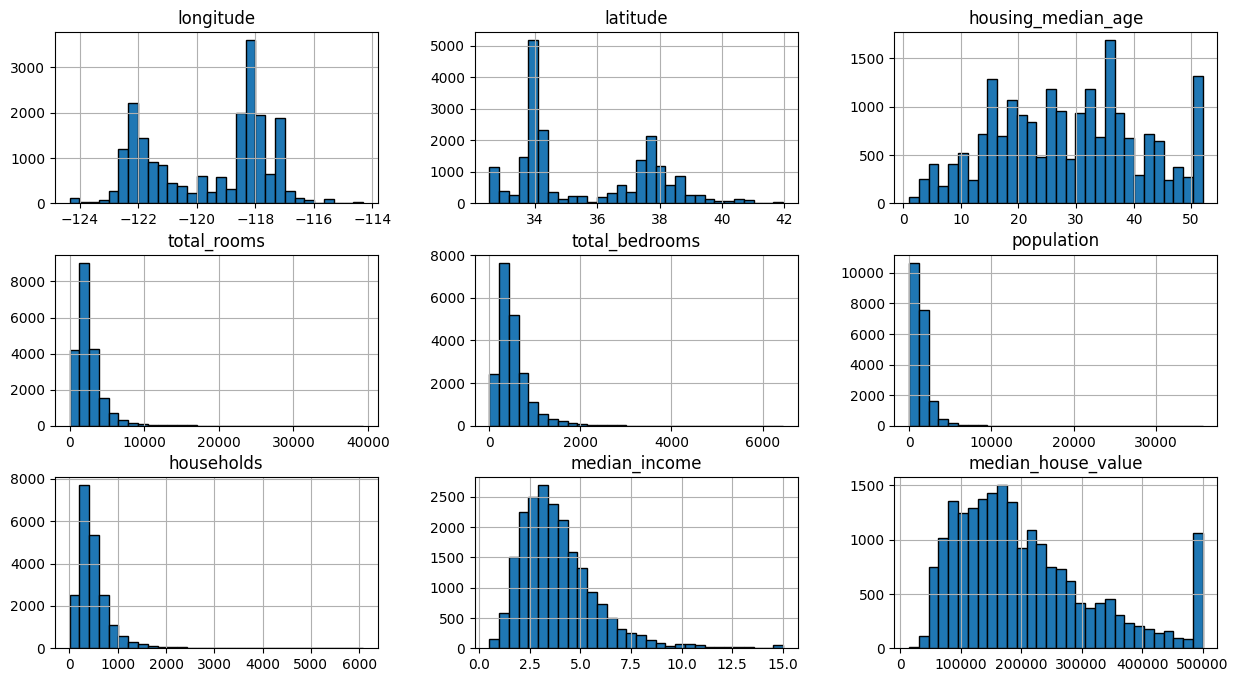

In [6]:
data.hist(figsize=(15,8), bins=30, edgecolor="black")

<Axes: xlabel='latitude', ylabel='longitude'>

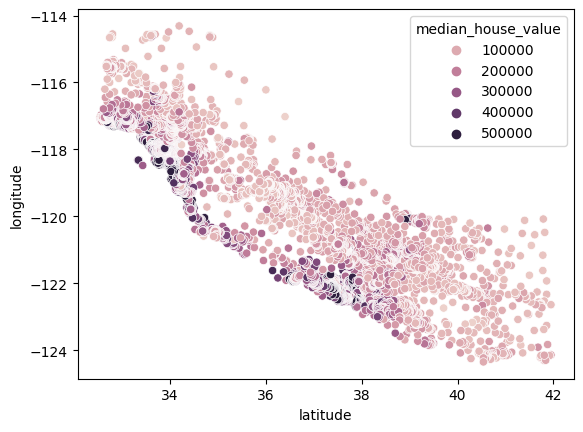

In [7]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value")

viendo este grafico, estamos viendo literalmente una representacion de california, siendo los lugares mas azules, los mas cercanos al mar, es un mapa literalmente

<Axes: xlabel='latitude', ylabel='longitude'>

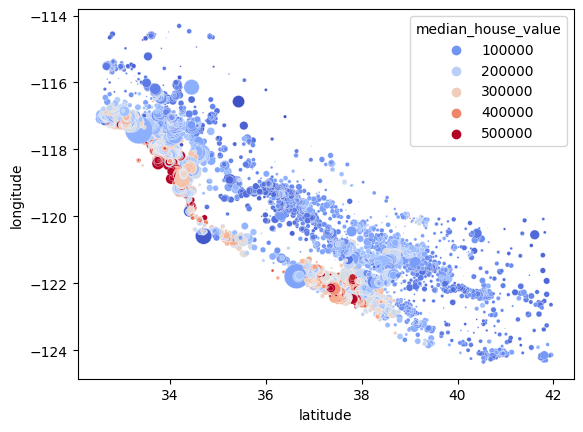

In [8]:
sb.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", s=data['population']/90, palette="coolwarm" )

con la s de size podemos ver donde hay mas o menos poblacion

<Axes: xlabel='latitude', ylabel='longitude'>

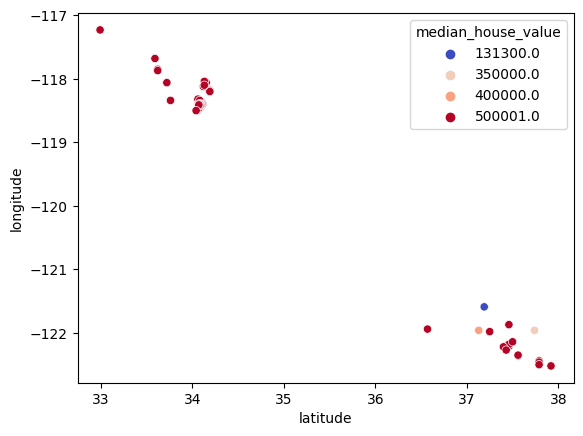

In [9]:
sb.scatterplot(x="latitude", y="longitude", data=data[(data.median_income > 14)], hue="median_house_value", palette="coolwarm" )

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Seguimos teniendo datos vacios entonces lo que haremos esta vez es quitar todos esos registros vacios:

In [11]:
data_na = data.dropna()

In [12]:
data_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Ahora ya esta arreglado, pero falta la columna que notiene valores numericos, hay que usar algo llamdo **Dummies / One-Hot- Encodig** que consiste en pasar en este caso los valores a booleanos representados por 0 o 1, es decir, *volver la columna original en varias columnas con 0 o 1*

In [13]:
#Dummies ? One-Hot encoding
# NEAR BAY    INLAND    NEAR OCEAN
#     1          0           0

dummies = pd.get_dummies(data_na['ocean_proximity'])

pandas nos permite crear los dummies (los 0 y 1's) que ahora agregaremos al set de datos

In [14]:
data_na = data_na.join(dummies)

In [15]:
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


Ya podemos ver que los dummies se agregaron y ahora hay mas columnas, sin embargo, es necesario eliminar la columna de 'ocean_proximity' que no contiene valores numericos

In [16]:
data_na = data_na.drop(['ocean_proximity'], axis=1)

In [17]:
data_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


**ANALISIS - NUEVAS CARACTERISTICAS**

In [18]:
data_na.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

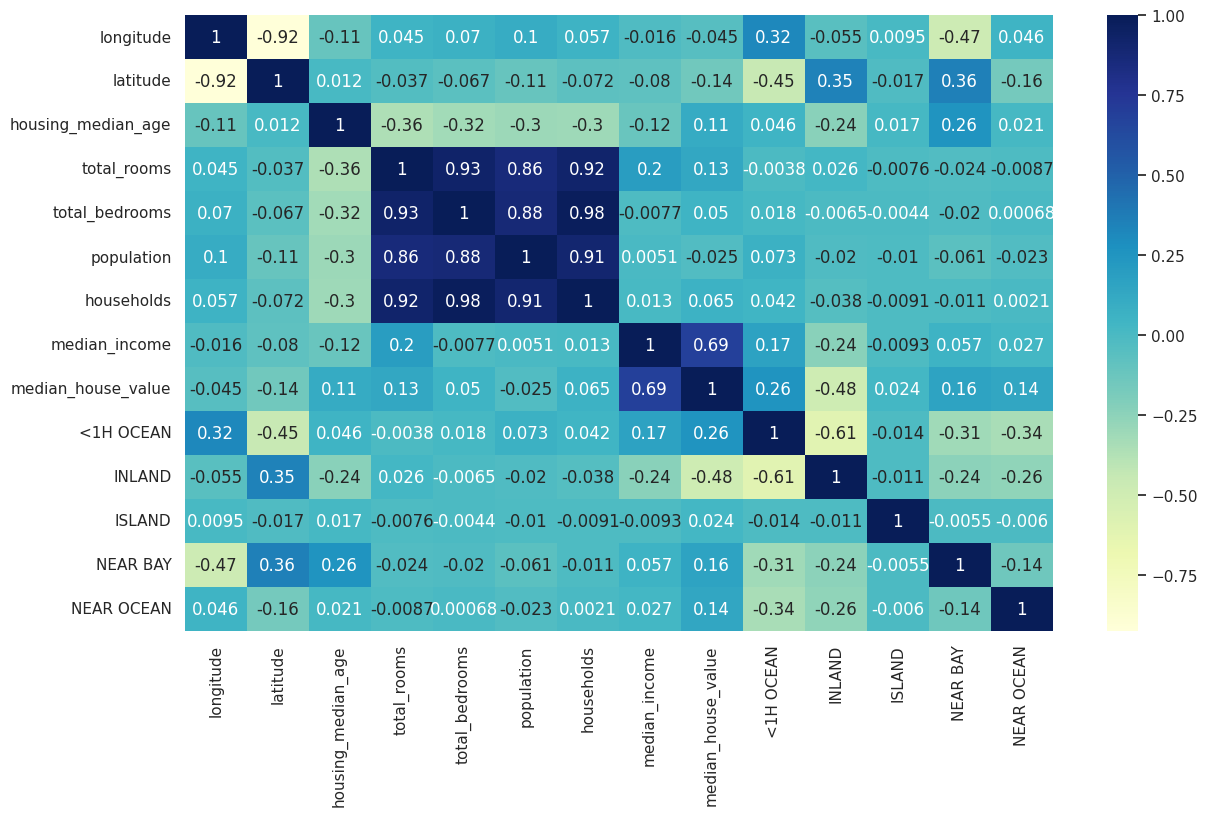

In [19]:
sb.set(rc={'figure.figsize': (14,8)})
sb.heatmap(data_na.corr(), annot=True, cmap="YlGnBu")

Esta grafica nos muestra la relacion entre tooodos los datos, entre mas a los extremos esté más relación proporcional o onversamente proporcional tiene, es decir, entre más azull o amarillo más relación parecen tener

In [20]:
data_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

Acá literalmente nos muestra de manera descendiente las relaciones más fuertes que tiene la columna "median_house_value" con el resto. Entre mas cerca al 0 menos relacion hay.

<Axes: xlabel='median_house_value', ylabel='median_income'>

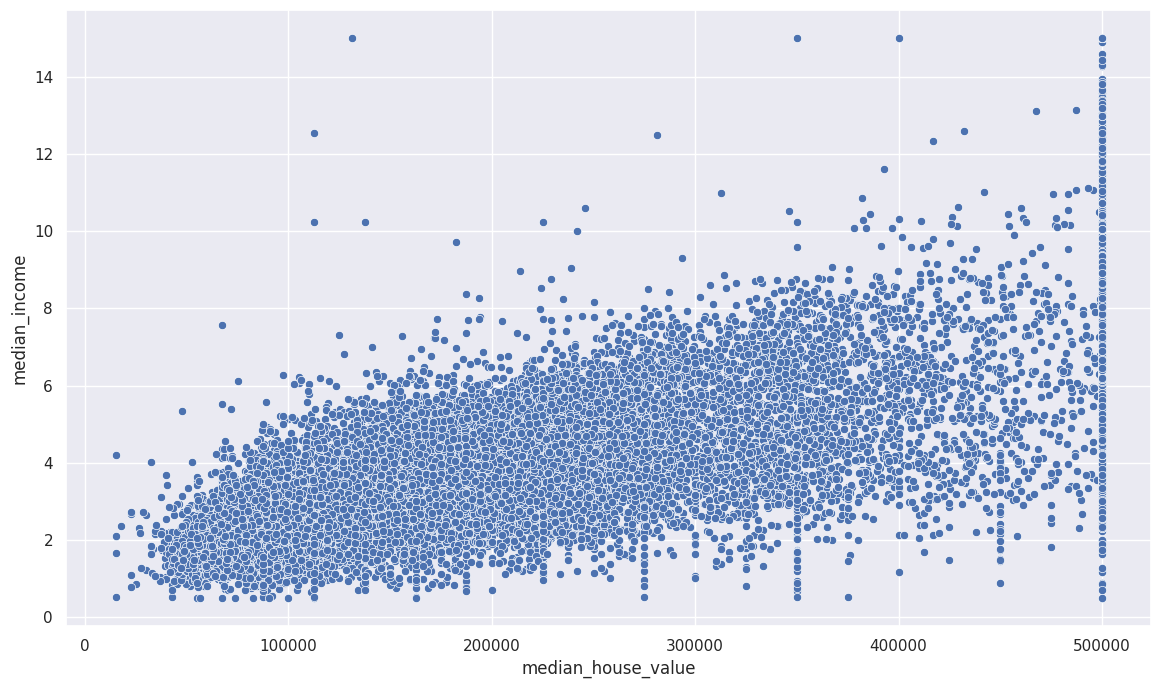

In [21]:
sb.scatterplot(x=data_na["median_house_value"], y=data_na["median_income"])

Se ve que **hay una correlacion**, pero hay un problema, como hay un "maximo" en el precio de las casas entonces muchos datos llegan hasta 500 y eso **es un problema**

Podemos:

*   Agregar nuevas caracteristicas.
*   Elemento de la lista



Inventar cuantos de los cuartos son para dormir:

In [22]:
data_na["bedroom_ratio"] = data_na["total_bedrooms"] / data_na["total_rooms"]

<Axes: >

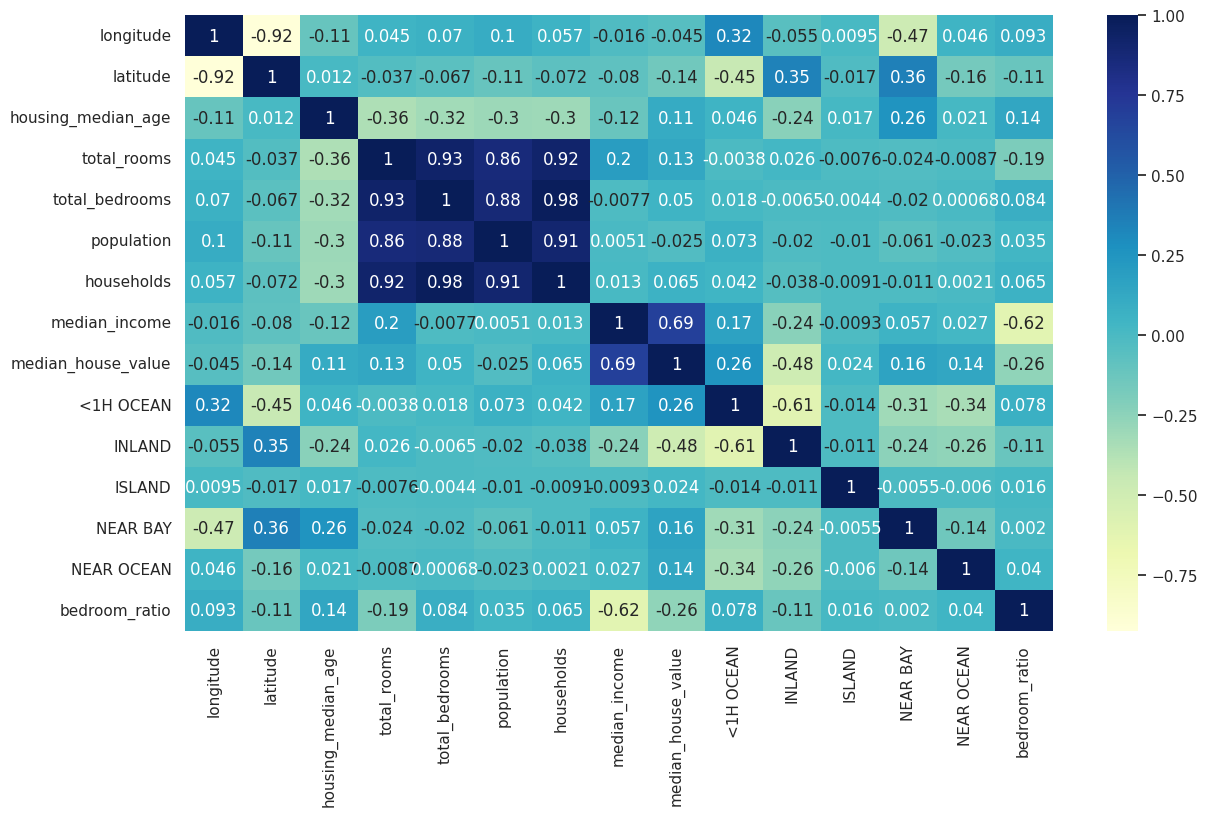

In [26]:
sb.set(rc={'figure.figsize': (14,8)})
sb.heatmap(data_na.corr(), annot=True, cmap="YlGnBu")

ahora bedroom_ratio existe y tiene una relacion medio fuerte con el median_house_value

**SEPARAR LAS CARACTERISTICAS DE LA ETIQUETA:**

In [27]:
X = data_na.drop(["median_house_value"], axis=1)
y = data_na["median_house_value"]

**SEPARAR LOS DATOS EN 2 PARTES: UN CONJUNTO DE ENTRENAMIENTO Y UNO DE PRUEBA:**
Por suerte sklearn tiene un metodo para separar/reservar de unos datos cierta cantidad para tests, asi se comprueba que el modelo no est[a memorizando los datos/respuestas.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Por ejemplo arriba se separa el 20% de los datos para pruebas, con el ".2". Se nos devuelven 4 datos, tests y training sets.

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

**ENTRENADO MODELO:**

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
X_train.shape

(16346, 14)

In [34]:
y_train.shape

(16346,)

In [35]:
model.score(X_train, y_train)

0.6495011163601653

In [37]:
predictions = model.predict(X_test)

In [38]:
predictions

array([121521.99461073, 102052.40825047, 286635.83381094, ...,
       100402.89208778, 342755.33498516, 151152.34221184])

In [40]:
comparation = {"prediction": predictions, "Real Value": y_test}
pd.DataFrame(comparation)

,prediction,Real Value
4911,121521.994611,129200.0
13616,102052.408250,78800.0
8064,286635.833811,406300.0
6488,158947.387496,179200.0
9661,-23646.036258,34600.0
...,...,...
20007,48997.255636,95500.0
4116,597198.982166,500001.0
3299,100402.892088,58800.0
11416,342755.334985,390500.0


Ademas podemos calcular el erro, que tanto estamos fallando en nuestras predicciones:

In [43]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, predictions)

Cmparamos entonces y_test que son los datos reservados para test con las predicciones:

In [44]:
mse

4372166987.236387

Se ele va el error al cuadrado para que los negativos se vuyelvan positivos y adem[as para que los numeros muy pequeños aumenten considerablemente, para ver el valor sin square se hace:

In [47]:
rmse = np.sqrt(mse)
rmse

66122.36374507786

Es por esto que el preprocesamiento de datos y la limpieza de los mismos es muy importante para entrenar y trabajar con datos.

In [52]:
data_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hay algo a revisar, utilizar un **scaler** que iguala los valores de todos los datos en cierto rango, para que de esta manera un modelo no le dé más valor a unos datos que a otros cuando no es acerca de la escala del numero, como por ejemplo la poblacion, siendo lo menor 3 y lo maximo 35.000

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)

In [54]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
7431,-118.20,33.94,42.0,618.0,163.0,680.0,179.0,3.3472,1,0,0,0,0,0.263754
14618,-117.15,32.80,23.0,2395.0,476.0,2284.0,488.0,3.7292,0,0,0,0,1,0.198747
10670,-117.86,33.62,17.0,2975.0,371.0,1247.0,398.0,10.1989,1,0,0,0,0,0.124706
18695,-122.39,40.58,44.0,1625.0,392.0,944.0,347.0,1.5972,0,1,0,0,0,0.241231
19209,-122.71,38.46,42.0,1574.0,376.0,844.0,369.0,2.3140,1,0,0,0,0,0.238882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14774,-117.08,32.59,8.0,2888.0,662.0,2441.0,683.0,2.7048,0,0,0,0,1,0.229224
11650,-118.04,33.85,23.0,3132.0,469.0,1646.0,478.0,5.7770,1,0,0,0,0,0.149745
1058,-121.86,39.76,19.0,7254.0,1785.0,4030.0,1667.0,2.0094,0,1,0,0,0,0.246071
13542,-117.31,34.14,38.0,2011.0,448.0,1190.0,403.0,1.8654,0,1,0,0,0,0.222775


In [56]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.688442,-0.797082,1.057022,-0.925101,-0.888920,-0.653185,-0.838571,-0.274943,1.122044,-0.681493,-0.015645,-0.354404,-0.383730,0.866975
1,1.211695,-1.330323,-0.450055,-0.110008,-0.145785,0.760649,-0.028015,-0.074078,-0.891231,-0.681493,-0.015645,-0.354404,2.605999,-0.244845
2,0.857876,-0.946763,-0.925974,0.156032,-0.395079,-0.153407,-0.264099,3.327842,1.122044,-0.681493,-0.015645,-0.354404,-0.383730,-1.511189
3,-1.399590,2.308816,1.215662,-0.463200,-0.345220,-0.420484,-0.397880,-1.195134,-0.891231,1.467366,-0.015645,-0.354404,-0.383730,0.481756
4,-1.559057,1.317174,1.057022,-0.486593,-0.383208,-0.508628,-0.340171,-0.818223,1.122044,-0.681493,-0.015645,-0.354404,-0.383730,0.441581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,1.246579,-1.428552,-1.639853,0.116126,0.295823,0.899035,0.483502,-0.612732,-0.891231,-0.681493,-0.015645,-0.354404,2.605999,0.276408
16342,0.768176,-0.839180,-0.450055,0.228047,-0.162404,0.198289,-0.054246,1.002703,1.122044,-0.681493,-0.015645,-0.354404,-0.383730,-1.082948
16343,-1.135471,1.925256,-0.767335,2.118770,2.962089,2.299648,3.064692,-0.978389,-0.891231,1.467366,-0.015645,-0.354404,-0.383730,0.564541
16344,1.131962,-0.703530,0.739743,-0.286145,-0.212263,-0.203649,-0.250983,-1.054108,-0.891231,1.467366,-0.015645,-0.354404,-0.383730,0.166099


Arriba queda evidenciado com ahora los datos han sido escalados de tal manera que esten en un rango numerico mas peque;o pero a escala siguen representando la data original

Con estos datos se puede buscar hacer el reentrnamiento buscando tener mejores resultados. **Aunque las reglas de preprocesamiento dependen de los datos**, es importante usar la grafica de correlacion para saber en que trabajar mas el modelo.